# Allen mouse connectiviy atlas tutrial

## Import libraries

In [1]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import numpy as np

import math, os, h5py
# sns.set()

In [2]:
path_manif = os.getcwd()
source = ['VISp']
resum = 50 # resoution um/pix (e.g. 25, 50, 100, ...)

with h5py.File("border_image.mat", 'r') as hf:
    print(hf)
    img = np.array(hf["borderImg"]).T
    hf["borderImg"]
    (img[:,:])

<HDF5 file "border_image.mat" (mode r)>


## Open MouseConnectivityCache class

In [3]:
mcc = MouseConnectivityCache(manifest_file=path_manif+os.sep+'manifest.json', resolution=resum)
struct_tree = mcc.get_structure_tree()
annot, annot_info = mcc.get_annotation_volume()

## Annotation map

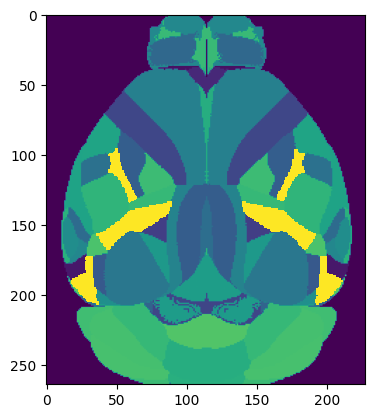

In [4]:
# %matplotlib qt
annot.shape
plt.imshow(annot[150,:,:])
CTXtopView = (annot[:,0,:])*0;
for i in range(np.shape(annot)[1]):
    changeROI = (CTXtopView ==0)
    CTXtopView[CTXtopView==0] = CTXtopView[CTXtopView==0] + (changeROI * (annot[:,i,:]))[CTXtopView==0];
plt.imshow(CTXtopView, vmax=1500)

In [5]:
(changeROI * (annot[:,i,:])).shape

(264, 228)

In [6]:
np.unique(CTXtopView)

array([        0,        68,        97,       171,       281,       313,
             320,       421,       442,       450,       482,       484,
             507,       512,       526,       527,       542,       558,
             593,       656,       671,       696,       698,       735,
             750,       805,       820,       828,       834,       836,
             842,       843,       851,       873,       878,       897,
             935,       936,       944,       949,       959,       981,
             997,      1006,      1007,      1016,      1025,      1030,
            1041,      1049,      1056,      1064,      1074,      1091,
            1121, 182305693, 312782550, 312782578, 312782604, 312782632],
      dtype=uint32)

## Structure tree

Example-1: structure information from acronym (e.g. VISp, VISpm, ACAd, ...)
 - id: structure unique id
 - name: full name of the structure
 - structure_id_path: hierarchical structure id

In [7]:
soi = struct_tree.get_structures_by_acronym(source)
display(soi)

[{'acronym': 'VISp',
  'graph_id': 1,
  'graph_order': 185,
  'id': 385,
  'name': 'Primary visual area',
  'structure_id_path': [997, 8, 567, 688, 695, 315, 669, 385],
  'structure_set_ids': [396673091,
   112905828,
   688152357,
   691663206,
   687527945,
   12,
   184527634,
   514166994,
   112905813,
   167587189,
   114512891,
   114512892],
  'rgb_triplet': [8, 133, 140]}]

Example of structure_id_path

In [8]:
for n in soi[0]["structure_id_path"]:
    print(n, struct_tree.get_structures_by_id([n])[0]["acronym"])

997 root
8 grey
567 CH
688 CTX
695 CTXpl
315 Isocortex
669 VIS
385 VISp


## Using RGB-triplet color

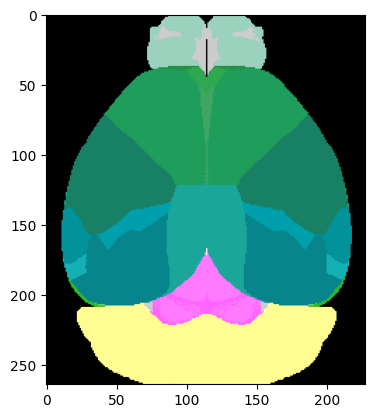

In [9]:
topView_RGB = np.array([CTXtopView]*3).transpose([1,2,0]).astype(int)*0

for d in np.unique(CTXtopView):
    tmp = struct_tree.get_structures_by_id([d])
    if d>0:
        rgb = tmp[0]["rgb_triplet"]
        for i in [0,1,2]:
            tmpMask = CTXtopView*0
            tmpMask[CTXtopView==d] = rgb[i]
            topView_RGB[:,:,i] += tmpMask
np.shape(topView_RGB)
plt.imshow(topView_RGB.astype(int))

## Get-experiments as a dataframes

[385]


,gender,injection_structures,injection_volume,injection_x,injection_y,injection_z,product_id,specimen_name,strain,structure_abbrev,structure_id,structure_name,transgenic_line,transgenic_line_id,id,primary_injection_structure
id,,,,,,,,,,,,,,,,
307297141,M,"[385, 409]",0.663636,9230,1910,8430,5,C57BL/6-152922,C57BL/6J,VISp,385,Primary visual area,None,None,307297141,385
113887162,M,"[385, 417]",0.407844,7900,1380,8470,5,378-1141,C57BL/6J,VISp,385,Primary visual area,None,None,113887162,385
180296424,M,"[385, 409, 425, 312782574, 312782628]",0.814006,9290,2220,9410,5,378-1815,C57BL/6J,VISp,385,Primary visual area,None,None,180296424,385
100147853,M,[385],0.073548,9440,1220,8630,5,378-874,C57BL/6J,VISp,385,Primary visual area,None,None,100147853,385
307321674,M,"[385, 409]",0.805374,8930,1810,8450,5,C57BL/6-152924,C57BL/6J,VISp,385,Primary visual area,None,None,307321674,385
304586645,M,[385],0.208906,8510,1540,8190,5,C57BL/6-144798,C57BL/6J,VISp,385,Primary visual area,None,None,304586645,385
307558646,M,"[385, 409]",1.058476,8740,1590,8140,5,C57BL/6-153763,C57BL/6J,VISp,385,Primary visual area,None,None,307558646,385
307320960,M,[385],0.514251,9340,1860,8300,5,C57BL/6-152923,C57BL/6J,VISp,385,Primary visual area,None,None,307320960,385
307743253,M,"[385, 409]",0.568667,8810,1890,8690,5,C57BL/6-153764,C57BL/6J,VISp,385,Primary visual area,None,None,307743253,385


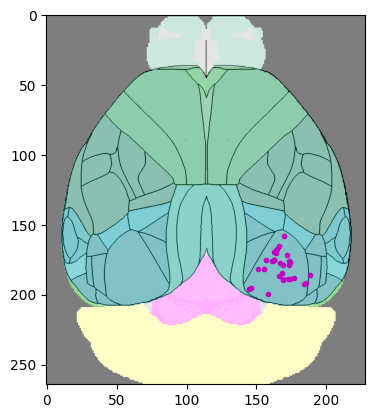

In [10]:
ids = []
for s in source:
    id = struct_tree.get_structures_by_acronym([s])[0]["id"]
    ids.append(id)
print(ids)

df_exps = mcc.get_experiments(
    cre=False, # include cre line or not
    dataframe=True,
    injection_structure_ids = ids
)
display(df_exps)
plt.imshow(topView_RGB.astype(int))
plt.imshow(img, cmap='Greys', alpha=.5,  extent=[0, topView_RGB.shape[1], topView_RGB.shape[0], 0])
plt.plot(df_exps["injection_z"]/resum, df_exps["injection_x"]/resum, '.m')

### Get projection density map

In [11]:
cortex_mask, cm_info = mcc.get_structure_mask(315) # isocortex id
pds = []
pd_infos = []
for i in df_exps.id:
    print(i)
    pd, pd_info = mcc.get_projection_density(i)
    pds.append(pd)
    pd_infos.append(pd_info)


307297141
113887162
180296424
100147853
307321674
304586645
307558646
307320960
307743253
113887868
307557934
114008926
309003780
277712166
304565427
277616630
277714322
307137980
304585910
309004492
309113907
277713580
126862385
307296433
127138787
307593747
174361040
100141219
304564721
272782668
304762965
309372716
638314843


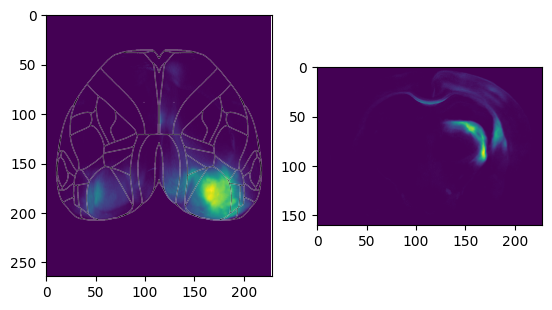

In [12]:
pd_average = np.array(pds).mean(axis=0)
plt.figure()
plt.subplot(1,2,1)
plt.imshow((pd_average*cortex_mask).max(axis=1))
plt.imshow(img, extent=[0, pd_average.shape[2], pd_average.shape[0], 0], alpha=(img==1).astype(float), cmap='Greys')
plt.subplot(1,2,2)
plt.imshow((pd_average[145:150,:,:]).max(axis=0))
